In [105]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация данных

In [106]:
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=2,
    center_box=(-6.0, 6.0),
    cluster_std=3.8,
    random_state=42
)

<Axes: >

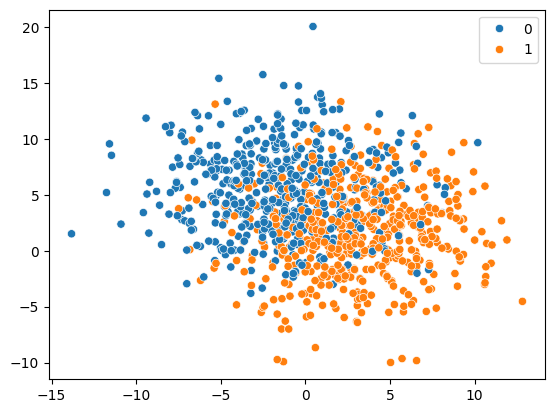

In [107]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Разбиение на обучающие и тестовые данные (70/30)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7, random_state=42
)

<Axes: >

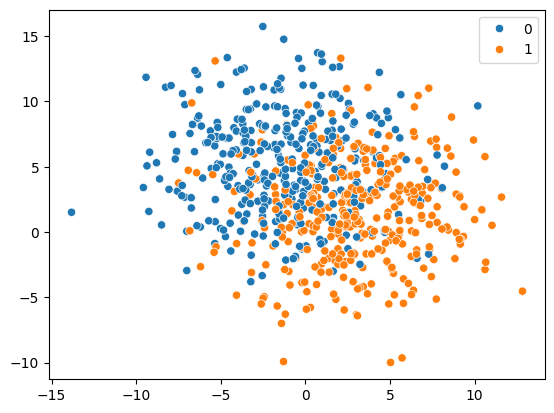

In [109]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

# Стандартизация данных, используя StandardScaler()

In [110]:
def StScaler(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

In [111]:
scalerXdata = StScaler(X_train)
scalerXtest = StScaler(X_test)

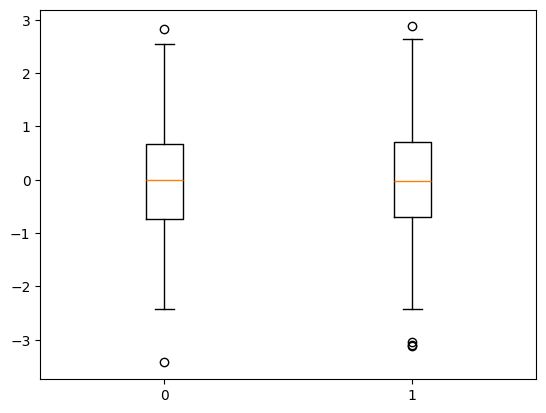

In [112]:
df = pd.DataFrame(scalerXdata)
plt.boxplot(df, tick_labels=df.columns)
plt.show()

# Обучение модели и прогноз (Логистическая регрессия)

## С выбросами

In [113]:
modelLinearR = LogisticRegression().fit(scalerXdata, y_train)

In [114]:
y_pred = modelLinearR.predict(scalerXtest).round()

# Оценка точности

In [115]:
accuracy = accuracy_score(y_test, y_pred)

In [116]:
print(f'Accuracy for LogicRegressuib: {round(accuracy, 2)}')

Accuracy for LogicRegressuib: 0.83


## Пример обработки выбросов

In [117]:
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=2,
    center_box=(-6.0, 6.0),
    cluster_std=3.8,
    random_state=42
)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7, random_state=42
)

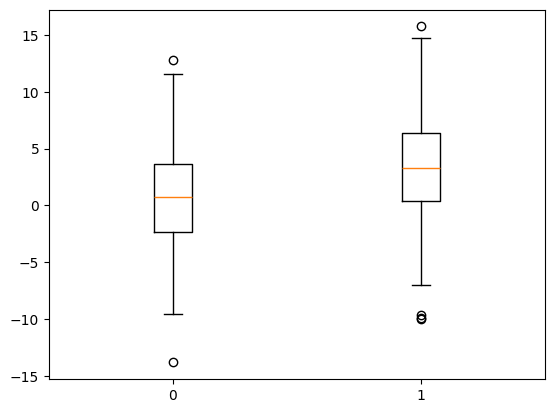

In [119]:
df = pd.DataFrame(X_train)
plt.boxplot(df, tick_labels=df.columns)
plt.show()

In [120]:
df.columns = [['fe_1', 'fe_2']]
scoreDF = StandardScaler().fit(df)
st_df = pd.DataFrame(scoreDF.transform(df))
st_df.columns = [['fe_1', 'fe_2']]
st_df.describe()

,fe_1,fe_2
count,7.000000e+02,7.000000e+02
mean,-7.612958e-17,-5.024552e-16
std,1.000715e+00,1.000715e+00
min,-3.426102e+00,-3.116435e+00
25%,-7.276362e-01,-6.961402e-01
50%,-3.687560e-03,-2.447447e-02
75%,6.768355e-01,7.011559e-01
max,2.834397e+00,2.875292e+00


In [121]:
Q1, Q3 = st_df['fe_1'].quantile(0.25), st_df['fe_1'].quantile(0.75)
IQR = Q3 - Q1

In [122]:
low, high = st_df['fe_1'].median() - 1.5 * IQR, st_df['fe_1'].median() + 1.5 * IQR
low, high = round(low.iloc[0], 2), round(high.iloc[0], 2)
print(low, high)

-2.11 2.1


In [123]:
f_Q1, f_Q3 = st_df['fe_2'].quantile(0.25), st_df['fe_2'].quantile(0.75)
IQR = f_Q3 - f_Q1

In [124]:
low_f, high_f = st_df['fe_2'].median() - 1.5 * IQR, st_df['fe_2'].median() + 1.5 * IQR
low_f, high_f = round(low_f.iloc[0], 2), round(high_f.iloc[0], 2)
print(low_f, high_f)

-2.12 2.07


In [125]:
l, r = df[(df['fe_1'] >= low) & (df['fe_1'] <= high)]['fe_1'],\
        df[(df['fe_2'] >= low_f) & (df['fe_2'] <= high_f)]['fe_2']
df_clean = pd.concat([l,r], axis=1)
df_clean.isna().sum()

fe_1    452
fe_2    505
dtype: int64

### Большая часть тренировочных данных имеют выбросы, удалять нет смысла, получится малая выборка и модель не обучится.
### Попробуем заменить на медиану

In [126]:
df_fill = pd.concat(
    [df_clean['fe_1'].fillna(df_clean['fe_1'].mean()), df_clean['fe_2'].fillna(df_clean['fe_2'].mean())], 
    axis=1
)
df_fill.describe()

,fe_1,fe_2
count,700.000000,700.000000
mean,0.085382,0.169998
std,0.699453,0.608983
min,-1.944982,-2.107563
25%,0.085382,0.169998
50%,0.085382,0.169998
75%,0.085382,0.169998
max,2.098104,2.032210


In [127]:
modelLR= LogisticRegression().fit(df, y_train)

## Подготовка тестовых данных

In [128]:
df_test = pd.DataFrame(X_test)
df_test.columns = [['fe_1', 'fe_2']]

In [129]:
scoreTest = StandardScaler().fit(df_test)
test_df = pd.DataFrame(scoreTest.transform(df_test))
test_df.columns = [['fe_1', 'fe_2']]
test_df.describe()

,fe_1,fe_2
count,300.000000,3.000000e+02
mean,0.000000,2.250052e-16
std,1.001671,1.001671e+00
min,-2.867969,-3.039187e+00
25%,-0.599733,-6.254792e-01
50%,-0.096716,-7.779755e-02
75%,0.710018,6.812971e-01
max,2.568432,3.643615e+00


In [130]:
Q1, Q3 = test_df['fe_1'].quantile(0.25), test_df['fe_1'].quantile(0.75)
IQR = Q3 - Q1

In [131]:
low, high = test_df['fe_1'].median() - 1.5 * IQR, test_df['fe_1'].median() + 1.5 * IQR
low, high = round(low.iloc[0], 2), round(high.iloc[0], 2)
print(low, high)

-2.06 1.87


In [132]:
f_Q1, f_Q3 = test_df['fe_2'].quantile(0.25), test_df['fe_2'].quantile(0.75)
IQR = f_Q3 - f_Q1

In [133]:
low_f, high_f = test_df['fe_2'].median() - 1.5 * IQR, test_df['fe_2'].median() + 1.5 * IQR
low_f, high_f = round(low_f.iloc[0], 2), round(high_f.iloc[0], 2)
print(low_f, high_f)

-2.04 1.88


In [134]:
l, r = df_test[(df_test['fe_1'] >= low) & (df_test['fe_1'] <= high)]['fe_1'],\
        df_test[(df_test['fe_2'] >= low_f) & (df_test['fe_2'] <= high_f)]['fe_2']
df_clean = pd.concat([l,r], axis=1)

In [135]:
df_fill = pd.concat(
    [df_clean['fe_1'].fillna(df_clean['fe_1'].mean()), df_clean['fe_2'].fillna(df_clean['fe_2'].mean())], 
    axis=1
)
df_fill.describe()

,fe_1,fe_2
count,300.000000,300.000000
mean,-0.390561,0.122193
std,0.650490,0.527427
min,-1.991605,-2.032253
25%,-0.390561,0.122193
50%,-0.390561,0.122193
75%,-0.390561,0.122193
max,1.838901,1.866313


In [136]:
y_pred = modelLR.predict(X_test)

In [137]:
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.83


Вывод: не было смысла убирать выбросы, т.к. датасет не большой

# SVM

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=42
)

In [139]:
scalerTrainSVM = StScaler(X_train)
scalerTestSVM = StScaler(X_test)

In [140]:
clf = svm.SVC().fit(scalerTrainSVM, y_train)

In [141]:
y_pred_SVC = clf.predict(scalerTestSVM).round()

In [142]:
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print(f'Accuracy for SVM: {accuracy_SVC}')

Accuracy for SVM: 0.82


# Дерево Решений

In [143]:
ctr = tree.DecisionTreeClassifier().fit(scalerTrainSVM, y_train)
y_pred_DTC = ctr.predict(scalerTestSVM).round()

In [144]:
accuracy_tree = accuracy_score(y_test, y_pred_DTC)
print(f'Accuracy for DecisionTreeClassifier: {round(accuracy_tree, 2)}')

Accuracy for DecisionTreeClassifier: 0.73


# Случайный лес

In [145]:
forest = RandomForestClassifier().fit(scalerTrainSVM, y_train)

In [146]:
y_pred_forest = forest.predict(scalerTestSVM)

In [147]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)

In [148]:
round(accuracy_forest, 2)

0.79

# Гипер параметры

Поиск гиперпараметров:

Используйте метод сеточного поиска (GridSearchCV) для поиска наилучших гиперпараметров для каждой модели.
Гиперпараметры для поиска:

* Логистическая регрессия: C (0.1, 1, 10)
* SVM: C (0.1, 1, 10) и gamma (0.01, 0.1, 1)
*   Дерево решений: max_depth (5, 10, 20) и min_samples_split (2, 5, 10)
*     Случайный лес: n_estimators (10, 50, 100) и max_depth (5, 10, 20)


In [149]:
param_LR = {'C': [0.1, 1, 10]}
param_SVM = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
param_tree = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
param_RF = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 20]}

In [150]:
grid_LR = GridSearchCV(
    LogisticRegression(max_iter=500),
    param_grid=param_LR,
    refit='accuracy',
    cv=3
)

In [151]:
grid_SVM = GridSearchCV(
    svm.SVC(),
    param_grid=param_SVM,
    refit='accuracy',
    cv=3
)

In [152]:
grid_tree = GridSearchCV(
    tree.DecisionTreeClassifier(),
    param_grid=param_tree,
    refit='accuracy',
    cv=3
)

In [153]:
grid_RF = GridSearchCV(
    RandomForestClassifier(),
    param_grid=param_RF,
    refit='accuracy',
    cv=3
)

# Оценка по обучающей выборке

In [154]:
grid_LR.fit(X_train, y_train)
grid_LR.best_params_
df_LR = pd.DataFrame(grid_LR.cv_results_)
df_LR[['params', 'mean_test_score']]

,params,mean_test_score
0,{'C': 0.1},0.791466
1,{'C': 1},0.791466
2,{'C': 10},0.791466


In [155]:
grid_SVM.fit(X_train, y_train)
grid_SVM.best_params_
df_SVM = pd.DataFrame(grid_SVM.cv_results_)
df_SVM[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'C': 0.1, 'gamma': 0.01}",0.787175
1,"{'C': 0.1, 'gamma': 0.1}",0.784319
2,"{'C': 0.1, 'gamma': 1}",0.701478
3,"{'C': 1, 'gamma': 0.01}",0.782889
4,"{'C': 1, 'gamma': 0.1}",0.782907
5,"{'C': 1, 'gamma': 1}",0.750046
6,"{'C': 10, 'gamma': 0.01}",0.778609
7,"{'C': 10, 'gamma': 0.1}",0.767195
8,"{'C': 10, 'gamma': 1}",0.722858


In [156]:
grid_tree.fit(X_train, y_train)
grid_tree.best_params_
df_DT = pd.DataFrame(grid_tree.cv_results_)
df_DT[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'max_depth': 5, 'min_samples_split': 2}",0.742838
1,"{'max_depth': 5, 'min_samples_split': 5}",0.742838
2,"{'max_depth': 5, 'min_samples_split': 10}",0.742838
3,"{'max_depth': 10, 'min_samples_split': 2}",0.714280
4,"{'max_depth': 10, 'min_samples_split': 5}",0.719997
5,"{'max_depth': 10, 'min_samples_split': 10}",0.712868
6,"{'max_depth': 20, 'min_samples_split': 2}",0.677146
7,"{'max_depth': 20, 'min_samples_split': 5}",0.692864
8,"{'max_depth': 20, 'min_samples_split': 10}",0.688578


In [157]:
grid_RF.fit(X_train, y_train)
df_RF = pd.DataFrame(grid_RF.cv_results_)
df_RF[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'max_depth': 5, 'n_estimators': 10}",0.761460
1,"{'max_depth': 5, 'n_estimators': 50}",0.772887
2,"{'max_depth': 5, 'n_estimators': 100}",0.767183
3,"{'max_depth': 10, 'n_estimators': 10}",0.748566
4,"{'max_depth': 10, 'n_estimators': 50}",0.744268
5,"{'max_depth': 10, 'n_estimators': 100}",0.754295
6,"{'max_depth': 20, 'n_estimators': 10}",0.745730
7,"{'max_depth': 20, 'n_estimators': 50}",0.747154
8,"{'max_depth': 20, 'n_estimators': 100}",0.747136


# Оценка на тестовых данных

In [158]:
print(f'Accuracy for LogicRegression: {grid_LR.best_estimator_.score(scalerXtest, y_test)}')
print(f'Accuracy for SVM: {round(grid_SVM.best_estimator_.score(scalerXtest, y_test), 2)}')
print(f'Accuracy for DecisionTreeClassifier: {round(grid_tree.best_estimator_.score(scalerXtest, y_test), 2)}')
print(f'Accuracy for RandomForestClassifier: {round(grid_RF.best_estimator_.score(scalerXtest, y_test), 2)}')


Accuracy for LogicRegression: 0.58
Accuracy for SVM: 0.58
Accuracy for DecisionTreeClassifier: 0.69
Accuracy for RandomForestClassifier: 0.75


# Джини
Коэффициент Джини. Выведите лучшие параметры и значение коэффициента Джини для каждой модели.

# Наилучшие параметры

In [162]:
auc_LR = roc_auc_score(y_test, y_pred)
auc_SVM = roc_auc_score(y_test, y_pred_SVC)
auc_DTC = roc_auc_score(y_test, y_pred_DTC)
auc_RFC = roc_auc_score(y_test, y_pred_forest)
auc_LR, auc_SVM, auc_DTC, auc_RFC

(0.8297479887995022, 0.819814213965065, 0.7333659273745499, 0.7933241477398996)

In [165]:
print(f'Best params for LogicRegression: {grid_LR.best_params_}. \nКоэффициент Джини: {round(2 * auc_LR - 1, 2)}', end='\n\n')
print(f'Best params for SVM: {grid_SVM.best_params_}. \nКоэффициент Джини: {round(2 * auc_SVM - 1, 2)}', end='\n\n')
print(f'Best params for DecisionTreeClassifier: {grid_tree.best_params_}. \nКоэффициент Джини: {round(2 * auc_DTC - 1, 2)}', end='\n\n')
print(f'Best params for RandomForestClassifier: {grid_RF.best_params_}. \nКоэффициент  Джини: {round(2 * auc_RFC - 1, 2)}', end='\n\n')

Best params for LogicRegression: {'C': 0.1}. 
Коэффициент Джини: 0.66

Best params for SVM: {'C': 0.1, 'gamma': 0.01}. 
Коэффициент Джини: 0.64

Best params for DecisionTreeClassifier: {'max_depth': 5, 'min_samples_split': 2}. 
Коэффициент Джини: 0.47

Best params for RandomForestClassifier: {'max_depth': 5, 'n_estimators': 50}. 
Коэффициент  Джини: 0.59

